# *Activity #6* of Lecture 3
Sanjita Prajapati




In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('/content/235-Nov (2).csv')

#3. Load the dataset into a Pandas DataFrame and inspect the first few rows


In [36]:
df.head(10)

,owner-id,network-id,date,time,utc-offset,start-ime,end-time,detector-id,status,lane-id,...,small-class-count,medium-class-count,large-class-count,device-id,link-direction,detector-type,sample-period,device-description,month,day
0,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB EN,OK,1,...,0,0,0,OpenTMS-Detector46573-0,w,unknown,60,ON_RAMP,11,10
1,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB RL,OK,4,...,0,1,0,OpenTMS-Detector46573-1,w,unknown,60,NORMAL,11,10
2,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB RCL,OK,3,...,0,0,0,OpenTMS-Detector46573-2,w,unknown,60,NORMAL,11,10
3,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB LCL,OK,2,...,0,0,0,OpenTMS-Detector46573-3,w,unknown,60,NORMAL,11,10
4,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB LL,OK,1,...,0,0,0,OpenTMS-Detector46573-4,w,unknown,60,NORMAL,11,10
5,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-EB LL,OK,1,...,0,0,0,OpenTMS-Detector46573-5,e,unknown,60,NORMAL,11,10
6,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-EB LCL,OK,2,...,0,2,0,OpenTMS-Detector46573-6,e,unknown,60,NORMAL,11,10
7,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-EB RCL,OK,3,...,0,2,0,OpenTMS-Detector46573-7,e,unknown,60,NORMAL,11,10
8,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-EB RL,OK,4,...,0,0,0,OpenTMS-Detector46573-8,e,unknown,60,NORMAL,11,10
9,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-EB EX,OK,1,...,0,1,0,OpenTMS-Detector46573-9,e,unknown,60,OFF_RAMP,11,10


#4. Preprocess the time column to convert from HHMMSS format to hours, and convert the date column to datetime format

In [37]:
# Function to convert time into hours
def time_to_hours(hhmmss):
  hh = hhmmss//10000
  return hh+(hhmmss%10000//100)/60+(hhmmss%100)/3600



In [38]:
time_in_hours = df['time'].apply(time_to_hours)
df['time'] = time_in_hours
data_column = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
df['date'] = data_column

In [40]:
print(df.head(10))

  owner-id network-id       date  time  utc-offset  start-ime  end-time  \
0   Q-Free     Q-Free 2021-11-10  8.15           0      80800     80900   
1   Q-Free     Q-Free 2021-11-10  8.15           0      80800     80900   
2   Q-Free     Q-Free 2021-11-10  8.15           0      80800     80900   
3   Q-Free     Q-Free 2021-11-10  8.15           0      80800     80900   
4   Q-Free     Q-Free 2021-11-10  8.15           0      80800     80900   
5   Q-Free     Q-Free 2021-11-10  8.15           0      80800     80900   
6   Q-Free     Q-Free 2021-11-10  8.15           0      80800     80900   
7   Q-Free     Q-Free 2021-11-10  8.15           0      80800     80900   
8   Q-Free     Q-Free 2021-11-10  8.15           0      80800     80900   
9   Q-Free     Q-Free 2021-11-10  8.15           0      80800     80900   

     detector-id status  lane-id  ...  small-class-count  medium-class-count  \
0   DMDS20-WB EN     OK        1  ...                  0                   0   
1   DMDS20-WB 

#5. Use loops to Calculate and print the average lane occupancy for each unique date.

In [41]:
unique_dates = df['date'].unique()
# print(unique_dates)
for i in unique_dates:
  avg_occupancy = df[df['date'] == i]['lane-occupancy'].mean()
  print(f"Average occupancy for {i}: {avg_occupancy}")

Average occupancy for 2021-11-10 00:00:00: 4.478697674418605
Average occupancy for 2021-11-02 00:00:00: 4.229873193748157
Average occupancy for 2021-11-08 00:00:00: 4.288217149907465
Average occupancy for 2021-11-11 00:00:00: 2.362357414448669
Average occupancy for 2021-11-03 00:00:00: 1.8052338530066816
Average occupancy for 2021-11-09 00:00:00: 1.9666355140186915


#6. Visualize the total lane counts based on status, create a pie chart.

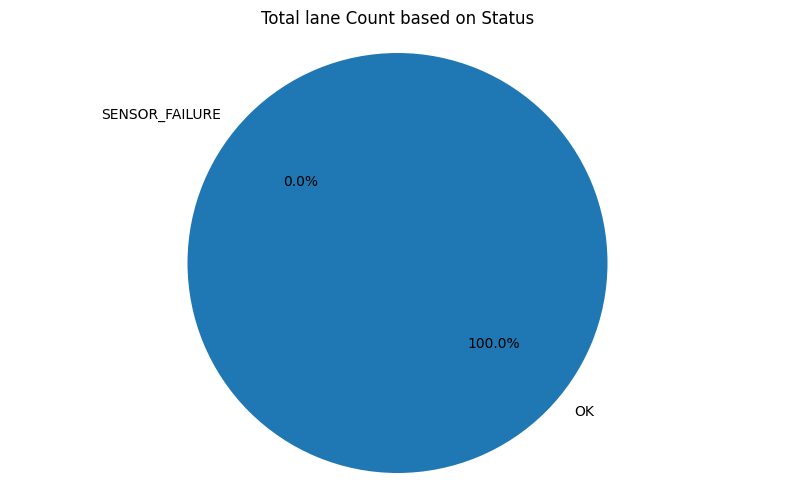

In [30]:
total_counts = df.groupby('status')['lane-count'].sum()
plt.figure(figsize=(10, 6))
plt.pie(total_counts,labels=total_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Total lane Count based on Status')
plt.axis('equal')
plt.show()

#7. Create Scatter Plot of Lane Occupancy vs. Lane Count.

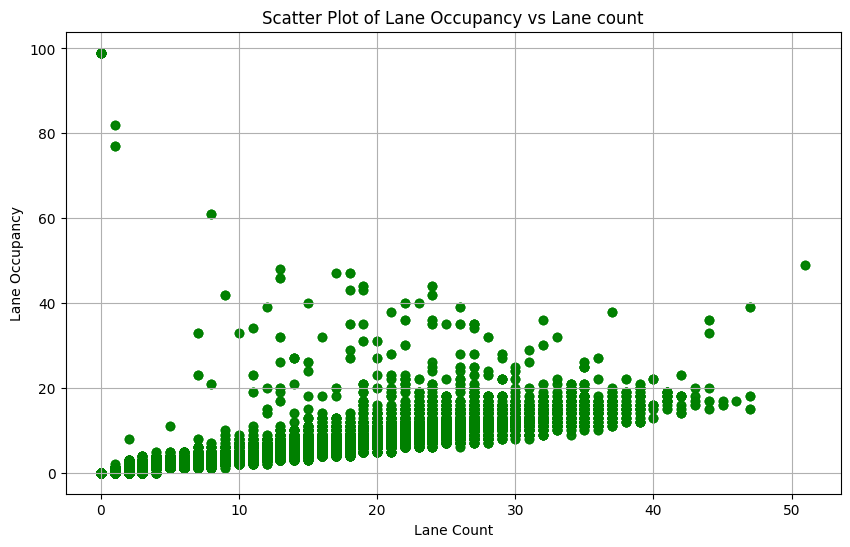

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['lane-count'], df['lane-occupancy'],color ='green',alpha=0.7)
plt.xlabel('Lane Count')
plt.ylabel('Lane Occupancy')
plt.title('Scatter Plot of Lane Occupancy vs Lane count')
plt.grid(True)
plt.show()